In [ ]:
from directed_graphs.datasets import visualize_heatmap, visualize_graph
import networkx as nx
from torch_geometric.utils import from_networkx
import torch
import torch_geometric

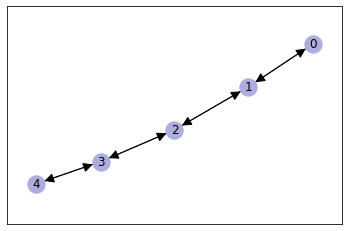

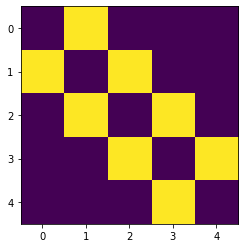

In [ ]:
G = nx.path_graph(5)
data = from_networkx(G)

visualize_graph(data)

sparse_A = torch.sparse_coo_tensor(data.edge_index, torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()


visualize_heatmap(data.edge_index)

# PHATE

Calculating PHATE...
  Running PHATE on 2000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.72 seconds.
    Calculating affinities...
    Calculated affinities in 0.48 seconds.
  Calculated graph and diffusion operator in 1.21 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.25 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.40 seconds.
Calculated PHATE in 11.89 seconds.


C:\Users\gtham\AppData\Local\Temp\ipykernel_1752\4020497857.py:6: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(tree_phate, c=tree_clusters)


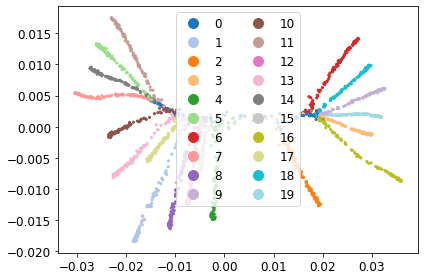

<AxesSubplot:>

In [ ]:
import phate
import matplotlib.pyplot as plt
tree_data, tree_clusters = phate.tree.gen_dla(n_dim=100, n_branch=20, branch_length=100)
phate_operator = phate.PHATE(knn=5, decay=20, t=150)
tree_phate = phate_operator.fit_transform(tree_data)
phate.plot.scatter2d(tree_phate, c=tree_clusters)

In [ ]:
import numpy as np
import torch
from torch_geometric.data import Data, InMemoryDataset, download_url, extract_gz
from torch_geometric.utils import sort_edge_index
from torch_sparse import SparseTensor
from torch_geometric.utils import remove_self_loops
import random
from decimal import Decimal
from directed_graphs.datasets import visualize_heatmap

In [ ]:
num_nodes = 200
W = [[0 for y in range(num_nodes)] for x in range(num_nodes)]

for i in range(int(num_nodes/2)):
    for j in range(int(num_nodes/2)):
        if Decimal(random.random()) < .75:
            W[i][j] = 1
    for j in range(int(num_nodes/2), num_nodes):
        if Decimal(random.random()) < .25:
            W[i][j] = 1

for i in range(int(num_nodes/2), num_nodes):
    for j in range(int(num_nodes/2)):
        if Decimal(random.random()) < .5:
            W[i][j] = 1
    for j in range(int(num_nodes/2), num_nodes):
        if Decimal(random.random()) < .75:
            W[i][j] = 1

class StochasticHuge(InMemoryDataset):
  def __init__(self,num_nodes = 10,transform=None):
    super().__init__(".", transform)
    
    dense_adj = torch.tensor(W)
    sparse_adj = SparseTensor.from_dense(dense_adj)
    row, col, _ = sparse_adj.coo()
    edge_index, _ = remove_self_loops(torch.stack([row, col]))

    x = torch.eye(num_nodes, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)
    self.data, self.slices = self.collate([data])

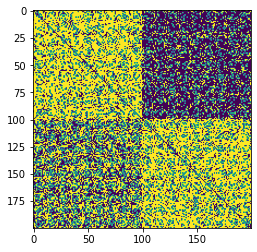

Calculating PHATE...
  Running PHATE on 200 observations and 200 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.01 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.07 seconds.
Calculated PHATE in 0.18 seconds.


C:\Users\gtham\AppData\Local\Temp\ipykernel_1752\1745588441.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1], c=clusters)


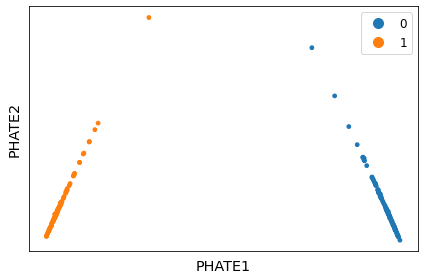

<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

In [ ]:
dataset = StochasticHuge()
data = dataset[0]
# visualize_graph(data)
visualize_heatmap(data.edge_index)

sparse_A = torch.sparse_coo_tensor(data.edge_index, torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
A = A.numpy()

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(A)
clusters = np.repeat([0,1],100)

phate.plot.scatter(data_phate[:,0],data_phate[:,1], c=clusters)


### PHATE on Shady Al

In [ ]:
def brute_tesfa_shadyal_obama():
    num_nodes = 14
    adj_mat = [[0 for y in range(num_nodes)] for x in range(num_nodes)]

    # 0: Obama
    # 1-6: Tesfa
    # 7: shady-al
    # 8-13: bots
    
    # everyone (except bots) in graph is connected to Obama
    for i in range(1, 8):
        adj_mat[i][0] = 1


    # everyone in Tesfa's circle is connected
    for i in range(1,7):
        for j in range(1,7):
            if i != j:
                adj_mat[i][j] = 1
    
    # shady-al's bots are connected to shady-al
    for i in range(8,14):
        adj_mat[i][7] = 1

    return adj_mat

class shadyal(InMemoryDataset):
  def __init__(self,num_nodes = 10,transform=None):
    super().__init__(".", transform)
    dense_adj = torch.tensor(brute_tesfa_shadyal_obama())
    sparse_adj = SparseTensor.from_dense(dense_adj)
    row, col, _ = sparse_adj.coo()
    edge_index, _ = remove_self_loops(torch.stack([row, col]))

    x = torch.eye(num_nodes, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)
    self.data, self.slices = self.collate([data])

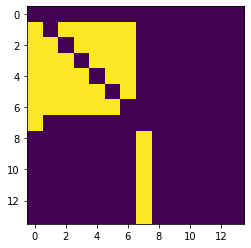

In [ ]:
dataset = shadyal()
data = dataset[0]
# visualize_graph(data)
visualize_heatmap(data.edge_index)

Calculating PHATE...
  Running PHATE on 14 observations and 14 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 4
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.
[[-2.32336874e-01  6.41500723e-03]
 [ 3.08579283e-01 -3.01459953e-05]
 [ 3.08569761e-01  3.92404361e-05]
 [ 3.08567901e-01 -1.00952382e-04]
 [ 3.08573940e-01 -1.70480951e-04]
 [ 3.08573079e-01  1.80127284e-04]
 [ 3.08572566e-01  1.10918808e-04]
 [-2.32332935e-01  6.42010294e-03]
 [-2.31127755e-01 -2.14396484e-03]
 [-2.31127818e-01 -2.14398004e-03]
 [-2.31127797e-01 -2.14396810e-03]
 [-2.31127803e-01 -2.14397213e-03]
 [-2.31127780e-01 -2.14396785e-03]
 [-2.31127770e-01 -2.14396441e-03]]


C:\Users\gtham\AppData\Roaming\Python\Python39\site-packages\graphtools\graphs.py:287: RuntimeWarning: Detected zero distance between 15 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
C:\Users\gtham\AppData\Roaming\Python\Python39\site-packages\graphtools\graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
C:\Users\gtham\AppData\Local\Temp\ipykernel_1752\1136887246.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1], c = clusters)


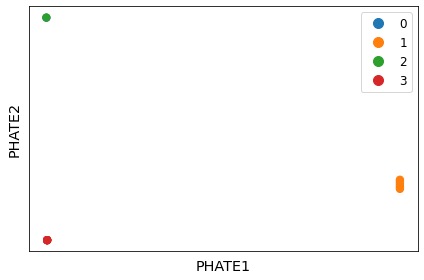

<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

In [ ]:
data = brute_tesfa_shadyal_obama()
data = np.array(data)

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)

print(data_phate)

# 0: Obama
# 1-6: Tesfa
# 7: shady-al
# 8-13: bots
clusters = [0,1,1,1,1,1,1,2,3,3,3,3,3,3]

phate.plot.scatter(data_phate[:,0],data_phate[:,1], c = clusters)